Linear simples = usa uma columa de valores (variaveis explanatorias) para prever as variaveis dependentes
Linear multipla = usa varias colunas calculando a relação delas com as que devem ser prevista.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm # usar R

In [37]:
base = pd.read_csv('../../dataset/mtcars.csv')
base.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Objetivo saber com base nas as cilindradas(disp) o consumo (mpg)

In [38]:
base = base.drop(['model'],axis=1) # columa desnecessaria

In [82]:
base.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [40]:
X = base.iloc[:, 2].values

In [41]:
y = base.iloc[:, 0].values

In [42]:
corr = np.corrcoef(X,y)

In [43]:
corr

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [44]:
X = X.reshape(-1,1) # colocar em formato de matriz

In [45]:
modelo = LinearRegression()

In [46]:
modelo.fit(X,y)

LinearRegression()

In [47]:
modelo.score(X,y)

0.7183433404897299

In [69]:
previsoes = modelo.predict(X)

In [70]:
previsoes # previsoes feita pelo modelo

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [51]:
y # valores reais

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

Usando o R - para fazer um modelo ajustado 

In [52]:
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data=base)

In [53]:
modelo_trein = modelo_ajustado.fit()

In [54]:
modelo_trein.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           9.38e-10
Time:                        16:23:12   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

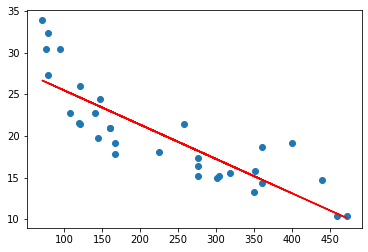

In [71]:
plt.scatter(X,y)
plt.plot(X,previsoes,color='red')

In [56]:
# correlação negativa linha inversa

In [76]:
novos_valores = np.array([500,543,590,600])
novos_valores = novos_valores.reshape(-1, 1)

In [78]:
prev_novos_valores = modelo.predict(novos_valores)

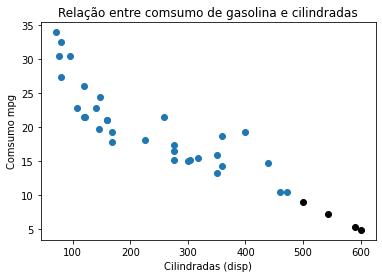

In [87]:
plt.title('Relação entre comsumo de gasolina e cilindradas')
plt.xlabel('Cilindradas (disp)')
plt.ylabel('Comsumo mpg')
plt.scatter(X,y) # valores conhecidos
plt.scatter(novos_valores,prev_novos_valores,color = 'black') # valores previstos

# Regressao linear multiplos

In [91]:
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [88]:
x1= base.iloc[:, 1:4].values # variaveis explanatorias

In [89]:
y1 = base.iloc[:,0].values # variaveis dependentes

In [20]:
modelo2=LinearRegression()

In [21]:
modelo2.fit(x1, y1)

LinearRegression()

In [90]:
modelo2.score(x1,y1) # correlaçao forte positiva

0.7678877440928638

In [95]:
novos_valores2 = np.array([[4,210,130], [6,225,130], [8,300,100],[8,310,150]])

In [96]:
novos_valores2 = novos_valores2.reshape(1,-1)
novos_valores2

array([[  4, 210, 130,   6, 225, 130,   8, 300, 100,   8, 310, 150]])

In [99]:
prev_novos_valores = modelo2.predict(novo_valores2)

In [101]:
prev_novos_valores

array([23.41092796, 20.67351681, 17.24620059, 16.32385299])